# Introduction

This is a step by step approach to the Predictive Insights competition.

Youth unemployment and under-employment is a major concern for any developing country, and serves as an important predictor of economic health and prosperity. Being able to predict, and understand,  which young people will find employment and which ones will require additional help,  helps promote evidence-based decision-making, supports economic empowerment, and allows young people to thrive in their chosen careers.

The objective of this challenge is to build a machine learning model that predicts youth employment, based on data from labour market surveys in South Africa.

This solution will help organisations like Predictive Insights achieve a baseline prediction of young peoples’ employment outcomes, allowing them to design and test interventions to help youth make a transition into the labour market or to improve their earnings.

# The Data

The data for this challenge comes from four rounds of a survey of youth in the South African labour market, conducted at 6-month intervals. The survey contains numerical, categorical and free-form text responses. You will also receive additional demographic information such as age and information about school level and results.

Each person in the dataset was surveyed one year prior (the ‘baseline’ data) to the follow-up survey. We are interested in predicting whether a person is employed at the follow-up survey based on their labour market status and other characteristics during the baseline.

The training set consists of one row or observation per individual - information collected at baseline plus only the target outcome (whether they were employed or not) one year later. The test set consists of the data collected at baseline without the target outcome.

The objective of this challenge is to predict whether a young person will be employed, one year after the baseline survey, based on their demographic characteristics, previous and current labour market experience and education outcomes, and to deliver an easy-to-understand and insightful solution to the data team at Predictive Insights.


# Exploratory Data Analysis

## Load libraries

In [159]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Load data

In [160]:
df_train = pd.read_csv("Train.csv")
df_test = pd.read_csv("Test.csv")

df_train.head()

,Person_id,Survey_date,Round,Status,Tenure,Geography,Province,Matric,Degree,Diploma,...,Math,Mathlit,Additional_lang,Home_lang,Science,Female,Sa_citizen,Birthyear,Birthmonth,Target
0,Id_eqz61wz7yn,2022-02-23,2,studying,NaN,Rural,Mpumalanga,1.0,0.0,0.0,...,0 - 29 %,NaN,50 - 59 %,NaN,0 - 29 %,1,1,2000,5,0
1,Id_kj5k3g5wud,2023-02-06,4,unemployed,427.0,Suburb,North West,1.0,0.0,0.0,...,30 - 39 %,NaN,40 - 49 %,NaN,30 - 39 %,1,1,1989,4,1
2,Id_9h0isj38y4,2022-08-08,3,other,NaN,Urban,Free State,1.0,0.0,0.0,...,30 - 39 %,NaN,40 - 49 %,NaN,30 - 39 %,0,1,1996,7,1
3,Id_5ch3zwpdef,2022-03-16,2,unemployed,810.0,Urban,Eastern Cape,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,1,2000,1,0
4,Id_g4elxibjej,2023-03-22,4,studying,NaN,Urban,Limpopo,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1,1,1998,12,0


## Univariate Analysis

Let's have a look at some of the variables.

Status

In [161]:
print(df_train["Status"].isnull().sum())
df_train["Status"].value_counts()


0


unemployed                1775
studying                   966
wage employed              763
other                      278
self employed              200
employment programme        31
wage and self employed       7
Name: Status, dtype: int64

Tenure

In [162]:
print(df_train["Tenure"].isnull().sum())
df_train["Tenure"].value_counts()

1394


0.0       133
36.0      101
64.0       64
5.0        55
273.0      47
         ... 
494.0       1
77.0        1
294.0       1
179.0       1
1159.0      1
Name: Tenure, Length: 641, dtype: int64

Matric

In [163]:
print(df_train["Matric"].isnull().sum())
df_train["Matric"].value_counts()

1008


1.0    2562
0.0     450
Name: Matric, dtype: int64

Degree

In [164]:
print(df_train["Degree"].isnull().sum())
df_train["Degree"].value_counts()

1831


0.0    2018
1.0     171
Name: Degree, dtype: int64

Diploma

In [165]:
print(df_train["Diploma"].isnull().sum())
df_train["Diploma"].value_counts()

1809


0.0    2031
1.0     180
Name: Diploma, dtype: int64

Schoolquintile

In [166]:
print(df_train["Schoolquintile"].isnull().sum())
df_train["Schoolquintile"].value_counts()

1661


3.0    739
2.0    504
1.0    445
4.0    329
5.0    275
0.0     67
Name: Schoolquintile, dtype: int64

Education system in South African which categorizes schools into five quintiles based on their socio-economic conditions. Quintile 1 (Q1), followed by Q2 schools are the poorest and receive the highest government funding, while Q4 and Q5(fee paying schools) schools are the least economically challenged and receive the lowest funding.

Round

In [167]:
print(df_train["Round"].isnull().sum())
df_train["Round"].value_counts()

0


4    1977
2     975
3     828
1     240
Name: Round, dtype: int64

Home_lang

In [168]:
print(df_train["Home_lang"].isnull().sum())
df_train["Home_lang"].value_counts()

3639


50 - 59 %     140
40 - 49 %     137
60 - 69 %      74
70 - 79 %      18
30 - 39 %       7
80 - 100 %      5
Name: Home_lang, dtype: int64

Additional_lang

In [169]:
print(df_train["Additional_lang"].isnull().sum())
df_train["Additional_lang"].value_counts()


2002


50 - 59 %     820
60 - 69 %     518
40 - 49 %     445
70 - 79 %     160
30 - 39 %      59
80 - 100 %     16
Name: Additional_lang, dtype: int64

Female

In [170]:
print(df_train["Female"].isnull().sum())
df_train["Female"].value_counts()

0


1    2269
0    1751
Name: Female, dtype: int64

Science

In [171]:
print(df_train["Science"].isnull().sum())
df_train["Science"].value_counts()

3288


30 - 39 %     263
40 - 49 %     182
0 - 29 %      116
50 - 59 %      98
60 - 69 %      47
80 - 100 %     14
70 - 79 %      12
Name: Science, dtype: int64

Math


In [172]:
print(df_train["Math"].isnull().sum())
df_train["Math"].value_counts()

3023


0 - 29 %      321
30 - 39 %     299
40 - 49 %     197
50 - 59 %      99
60 - 69 %      49
70 - 79 %      21
80 - 100 %     11
Name: Math, dtype: int64

Mathlit

In [173]:
print(df_train["Mathlit"].isnull().sum())
df_train["Mathlit"].value_counts()

2667


40 - 49 %     420
30 - 39 %     344
50 - 59 %     292
60 - 69 %     154
0 - 29 %       80
70 - 79 %      50
80 - 100 %     13
Name: Mathlit, dtype: int64

**sa_citizen**

In [174]:
print(df_train["Sa_citizen"].isnull().sum())
df_train["Sa_citizen"].value_counts()

0


1    4018
0       2
Name: Sa_citizen, dtype: int64

The values where `sa_citizen` are 0 are very underrepresented. It could be a good idea to remove the rows where `sa_citizen` = 0 but that could lead to a loss of data. Alternatively, one could consider removing the column altogether.

**geography**

In [175]:
print(df_train["Geography"].isnull().sum())
df_train["Geography"].value_counts()

0


Urban     2797
Rural      803
Suburb     420
Name: Geography, dtype: int64

From this, we see that candidates come from three geographical categories: Rural, Suburb, and Urban. The majority come from urban areas.

**tenure**

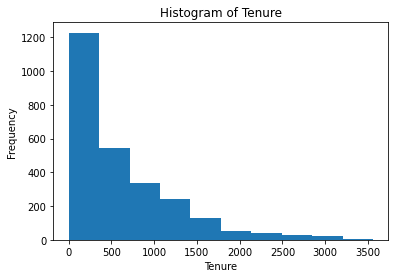

In [176]:
# Generate a histogram of the tenure variable using matplotlib
plt.hist(df_train["Tenure"])
plt.xlabel("Tenure")
plt.ylabel("Frequency")
plt.title("Histogram of Tenure")
plt.show()

This histogram indicates that `tenure` has a skewed distribution, with a concentration of values towards the lower end and the presence of outliers.

Next, we will look at the distribution of the `birthyear` variable.

**birthyear**

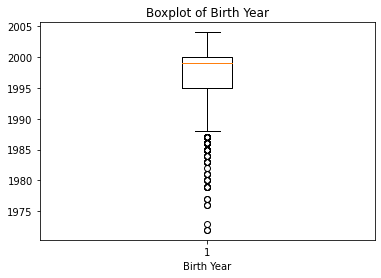

In [177]:
# Generate a boxplot of the birthyear variable using matplotlib

plt.boxplot(df_train['Birthyear'])
plt.title("Boxplot of Birth Year")
plt.xlabel("Birth Year")

plt.show()

The presence of many points below the first quartile suggests a left-skewed skewed distribution, with many outliers on the lower end.
To get more details, we can use the `pandas.DataFrame.describe()` function.

In [178]:
#  get the key statistics of `birthyear` using pandas.DataFrame.describe()
df_train['Birthyear'].describe()

count    4020.000000
mean     1997.462935
std         4.378334
min      1972.000000
25%      1995.000000
50%      1999.000000
75%      2000.000000
max      2004.000000
Name: Birthyear, dtype: float64

From this, we see that most candidates were born between 1995 and 2000.

## Bivariate Analysis

Now, let us look at the relationships between a few variables and the target variables.

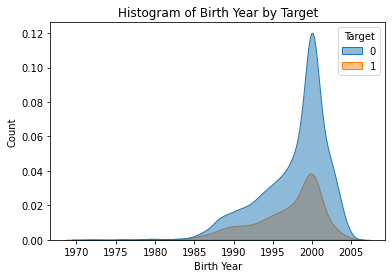

In [179]:
sns.kdeplot(data=df_train, x="Birthyear", hue="Target", fill=True, alpha=0.5)
plt.xlabel("Birth Year")
plt.ylabel("Count")
plt.title("Histogram of Birth Year by Target")
plt.show()

The ages of candidates with a positive outcome and those with a negative outcome seem to follow a similar distribution.

We will now look at the percentage of candidates with a positive outcome in each province.

In [180]:
# Calculate the percentage of positive income for each province

df_province = df_train.groupby('Province').agg(percentage=('Target', 'mean')).reset_index()
df_province["percentage"] = df_province["percentage"] * 100
df_province = df_province.sort_values('percentage', ascending=False).reset_index()

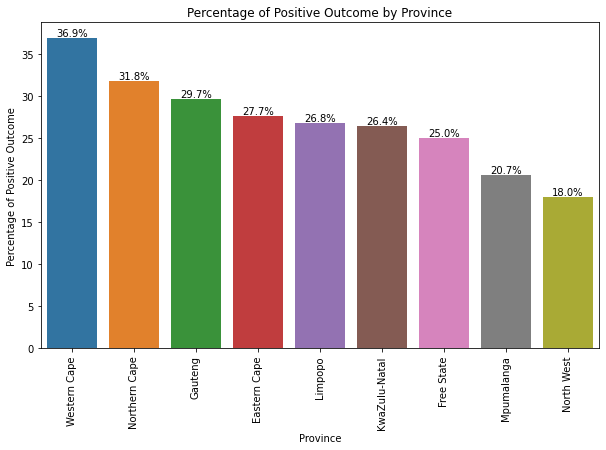

In [181]:
# Generate a bar plot for the 'percentage' positive income for each province

plt.figure(figsize=(10, 6))
sns.barplot(data=df_province, x='Province', y='percentage')
plt.xlabel('Province')
plt.ylabel('Percentage of Positive Outcome')
plt.title('Percentage of Positive Outcome by Province')

for index, row in df_province.sort_values('percentage', ascending=False).iterrows():
  plt.text(row.name, row.percentage, f"{round(row.percentage, 1)}%", ha='center', va='bottom')
plt.xticks(rotation=90, ha='center')

plt.show()

In the training data, candidates from the Western Cape are the most likely to get a positive outcome, while those from the North West province are least likely.

What about the `geography` variable?

In [182]:
# Calculate the percentage of positive income for each `geography`

df_geography = df_train.groupby('Geography').agg(percentage=('Target', 'mean')).reset_index()
df_geography["percentage"] = df_geography["percentage"] * 100
df_geography = df_geography.sort_values('percentage', ascending=False).reset_index()

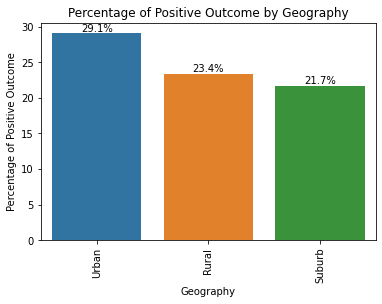

In [183]:
# Generate a bar plot for the 'percentage' positive income for each `geography`

plt.figure(figsize=(6, 4))
sns.barplot(data=df_geography, x='Geography', y='percentage')
plt.xlabel('Geography')
plt.ylabel('Percentage of Positive Outcome')
plt.title('Percentage of Positive Outcome by Geography')

# Add labels to the bars
for index, row in df_geography.iterrows():
    plt.text(row.name, row.percentage, f"{round(row.percentage, 1)}%", ha='center', va='bottom')

# Rotate x-axis labels
plt.xticks(rotation=90, ha='center')

plt.show()

We see that people from "Urban" areas are most likely to get a positive outcome.

In terms if gender, we see below that males in the data set are more likely to get a job after one year.

In [184]:
df_female = df_train.groupby('Female').agg(percentage=('Target', 'mean')).reset_index()
df_female["percentage"] = df_female["percentage"] * 100
df_female = df_female.sort_values('percentage', ascending=False).reset_index()

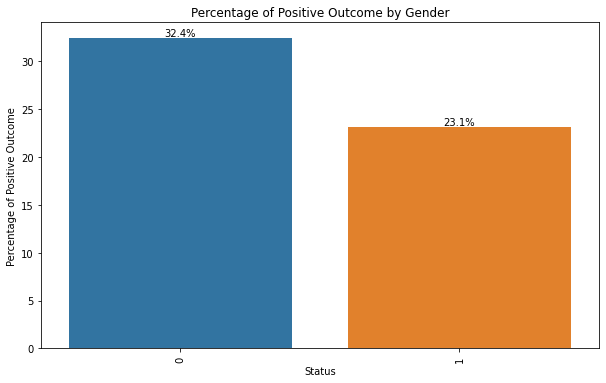

In [185]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df_female, x='Female', y='percentage')
plt.xlabel('Status')
plt.ylabel('Percentage of Positive Outcome')
plt.title('Percentage of Positive Outcome by Gender')

# Add labels to the bars
for index, row in df_female.iterrows():
    plt.text(row.name, row.percentage, f"{round(row.percentage, 1)}%", ha='center', va='bottom')

# Rotate x-axis labels
plt.xticks(rotation=90, ha='center')

plt.show()

# Feature Engineering

Feature engineering is the process of transforming raw data into meaningful features that may improve the performance of machine learning models. It involves selecting, creating, and transforming variables to capture relevant information and enhance the predictive power of the model.

Let's extract the year of the survey then use it to calculate the age of each participant at the time of the survey.

In [186]:
df_train['Year_survey'] = pd.to_datetime(df_train['Survey_date']).dt.year
df_train['Age_survey'] = df_train['Year_survey'] - df_train['Birthyear']
df_train['Age_survey'].head()

0    22
1    34
2    26
3    22
4    25
Name: Age_survey, dtype: int64

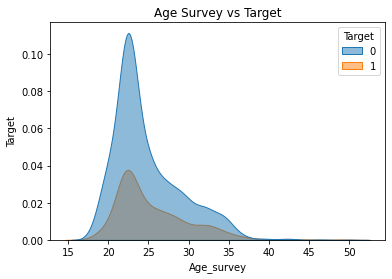

In [188]:
sns.kdeplot(data=df_train, x="Age_survey", hue="Target", fill=True, alpha=0.5)
plt.xlabel("Age_survey")
plt.ylabel("Target")
plt.title("Age Survey vs Target")
plt.show()

Next, we create a variable that indicates the number of subjects where the participants have obtained 70% or more.

In [189]:
df_train['Subjects_over_70'] = df_train.apply(lambda row: row.str.contains("80 - 100 %|70 - 79 %").sum(), axis=1)
df_train['Subjects_over_70'].value_counts()

0    3743
1     242
2      27
3       8
Name: Subjects_over_70, dtype: int64

In [190]:
df_train.head()

,Person_id,Survey_date,Round,Status,Tenure,Geography,Province,Matric,Degree,Diploma,...,Home_lang,Science,Female,Sa_citizen,Birthyear,Birthmonth,Target,Year_survey,Age_survey,Subjects_over_70
0,Id_eqz61wz7yn,2022-02-23,2,studying,NaN,Rural,Mpumalanga,1.0,0.0,0.0,...,NaN,0 - 29 %,1,1,2000,5,0,2022,22,0
1,Id_kj5k3g5wud,2023-02-06,4,unemployed,427.0,Suburb,North West,1.0,0.0,0.0,...,NaN,30 - 39 %,1,1,1989,4,1,2023,34,0
2,Id_9h0isj38y4,2022-08-08,3,other,NaN,Urban,Free State,1.0,0.0,0.0,...,NaN,30 - 39 %,0,1,1996,7,1,2022,26,0
3,Id_5ch3zwpdef,2022-03-16,2,unemployed,810.0,Urban,Eastern Cape,NaN,NaN,NaN,...,NaN,NaN,0,1,2000,1,0,2022,22,0
4,Id_g4elxibjej,2023-03-22,4,studying,NaN,Urban,Limpopo,NaN,NaN,NaN,...,NaN,NaN,1,1,1998,12,0,2023,25,0


Feel free to explore these newly created variables and decide whether you'd like to discard them.

## Dummy variables

In this section, we convert our categorical variables into dummy variables.

In [140]:
# Create a list of categorical variables
selected_vars = ["Round", "Status", "Geography", "Province",
                                              "Schoolquintile", "Math", "Mathlit", "Additional_lang", "Home_lang", "Science"]
# Remove variables we will not use
df_train_dummy = df_train.drop(["Person_id", "Survey_date"], axis = 1)

# Convert character variables to dummy variables
df_train_dummy = pd.get_dummies(df_train_dummy, columns=selected_vars, drop_first=True, dummy_na=True)
df_train_dummy.columns

Index(['Tenure', 'Matric', 'Degree', 'Diploma', 'Female', 'Sa_citizen',
       'Birthyear', 'Birthmonth', 'Target', 'Year_survey', 'Age_survey',
       'Subjects_over_70', 'Round_2.0', 'Round_3.0', 'Round_4.0', 'Round_nan',
       'Status_other', 'Status_self employed', 'Status_studying',
       'Status_unemployed', 'Status_wage and self employed',
       'Status_wage employed', 'Status_nan', 'Geography_Suburb',
       'Geography_Urban', 'Geography_nan', 'Province_Free State',
       'Province_Gauteng', 'Province_KwaZulu-Natal', 'Province_Limpopo',
       'Province_Mpumalanga', 'Province_North West', 'Province_Northern Cape',
       'Province_Western Cape', 'Province_nan', 'Schoolquintile_1.0',
       'Schoolquintile_2.0', 'Schoolquintile_3.0', 'Schoolquintile_4.0',
       'Schoolquintile_5.0', 'Schoolquintile_nan', 'Math_30 - 39 %',
       'Math_40 - 49 %', 'Math_50 - 59 %', 'Math_60 - 69 %', 'Math_70 - 79 %',
       'Math_80 - 100 %', 'Math_nan', 'Mathlit_30 - 39 %', 'Mathlit_40 - 49

# Data cleaning

## Cleaning column names

The dummification process created some messy column names. Here, we're trying to clean those.

In [141]:
# Clean column names
df_train_dummy.columns = df_train_dummy.columns.str.replace(' ', '_')  # Replace spaces with underscores
df_train_dummy.columns = df_train_dummy.columns.str.replace('[^\w\s]', '', regex=True)  # Remove special characters
df_train_dummy.columns = df_train_dummy.columns.str.replace('_+', '_', regex=True)  # Replace consecutive underscores with a single underscore
df_train_dummy.columns = df_train_dummy.columns.str.rstrip('_')  # Remove trailing underscores at the end
df_train_dummy.columns

Index(['Tenure', 'Matric', 'Degree', 'Diploma', 'Female', 'Sa_citizen',
       'Birthyear', 'Birthmonth', 'Target', 'Year_survey', 'Age_survey',
       'Subjects_over_70', 'Round_20', 'Round_30', 'Round_40', 'Round_nan',
       'Status_other', 'Status_self_employed', 'Status_studying',
       'Status_unemployed', 'Status_wage_and_self_employed',
       'Status_wage_employed', 'Status_nan', 'Geography_Suburb',
       'Geography_Urban', 'Geography_nan', 'Province_Free_State',
       'Province_Gauteng', 'Province_KwaZuluNatal', 'Province_Limpopo',
       'Province_Mpumalanga', 'Province_North_West', 'Province_Northern_Cape',
       'Province_Western_Cape', 'Province_nan', 'Schoolquintile_10',
       'Schoolquintile_20', 'Schoolquintile_30', 'Schoolquintile_40',
       'Schoolquintile_50', 'Schoolquintile_nan', 'Math_30_39', 'Math_40_49',
       'Math_50_59', 'Math_60_69', 'Math_70_79', 'Math_80_100', 'Math_nan',
       'Mathlit_30_39', 'Mathlit_40_49', 'Mathlit_50_59', 'Mathlit_60_69',
  

## Dealing with missing values

We will use a simplified method for replacing missing values: replacing them with zero.

In [142]:
df_train_dummy = df_train_dummy.fillna(0)

# Logistic Regression Modeling

Logistic Regression is a statistical modeling technique used to predict binary outcomes or probabilities. It is commonly used when the dependent variable (target variable) is categorical and has two possible outcomes, such as yes/no, success/failure, or 0/1.

To perform logistic regression with 10-fold cross-validation using scikit-learn, you can use the following code:

In [143]:
# Import
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

In [158]:
# Separate the features and target variables
X = df_train_dummy.drop('Target', axis=1)
y = df_train_dummy['Target']

# Set up logistic regression model
model = LogisticRegression()

# Set up cross-validation strategy
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Perform cross-validation and calculate ROC AUC
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv)


c:\Users\110342\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\110342\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

In [145]:

# Print the mean ROC AUC score across folds
print('Mean ROC AUC:', scores.mean())

Mean ROC AUC: 0.7735846589181199


# Predict on the test set

In [146]:
# Test set preview
df_test.head()

,Person_id,Survey_date,Round,Status,Tenure,Geography,Province,Matric,Degree,Diploma,Schoolquintile,Math,Mathlit,Additional_lang,Home_lang,Science,Female,Sa_citizen,Birthyear,Birthmonth
0,Id_r90136smvl,2022-08-03,3,other,NaN,Urban,KwaZulu-Natal,1.0,0.0,0.0,2.0,0 - 29 %,NaN,50 - 59 %,NaN,40 - 49 %,0,1,2002,12
1,Id_wawdqhmu6s,2023-03-16,4,unemployed,979.0,Urban,Western Cape,1.0,0.0,0.0,NaN,NaN,NaN,40 - 49 %,NaN,NaN,1,1,1989,12
2,Id_ap2czff2bu,2023-03-14,4,unemployed,339.0,Urban,KwaZulu-Natal,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,1,1,1989,12
3,Id_uhgink7iha,2023-02-16,4,studying,NaN,Urban,Gauteng,1.0,0.0,0.0,1.0,NaN,80 - 100 %,60 - 69 %,NaN,NaN,0,1,2002,11
4,Id_5j6bzk3k81,2023-03-23,4,unemployed,613.0,Urban,Gauteng,0.0,0.0,0.0,5.0,NaN,NaN,NaN,NaN,NaN,1,1,1993,10


## Pre-processing

We need to make sure the test data undergoes the same pre-processing steps as the training data did.

In [147]:
# Create "year_survey" column then
# Create "age_survey" column
df_test['Year_survey'] = pd.to_datetime(df_test['Survey_date']).dt.year
df_test['Age_survey'] = df_test['Year_survey'] - df_test['Birthyear']
df_test['Age_survey'].head()

0    20
1    34
2    34
3    21
4    30
Name: Age_survey, dtype: int64

In [148]:
df_test['Subjects_over_70'] = df_test.apply(lambda row: row.str.contains("80 - 100 %|70 - 79 %").sum(), axis=1)
df_test['Subjects_over_70'].value_counts()

0    1817
1      90
2      19
3       8
Name: Subjects_over_70, dtype: int64

In [149]:
# Remove variables we will not use
df_test_dummy = df_test.drop(["Person_id", "Survey_date"], axis = 1)

# Convert character variables to dummy variables
df_test_dummy = pd.get_dummies(df_test_dummy, columns=selected_vars, drop_first=True, dummy_na=True)

# Clean column names
df_test_dummy.columns = df_test_dummy.columns.str.replace(' ', '_')  # Replace spaces with underscores
df_test_dummy.columns = df_test_dummy.columns.str.replace('[^\w\s]', '', regex=True)  # Remove special characters
df_test_dummy.columns = df_test_dummy.columns.str.replace('_+', '_', regex=True)  # Replace consecutive underscores with a single underscore
df_test_dummy.columns = df_test_dummy.columns.str.rstrip('_')  # Remove trailing underscores at the end
df_test_dummy.columns

Index(['Tenure', 'Matric', 'Degree', 'Diploma', 'Female', 'Sa_citizen',
       'Birthyear', 'Birthmonth', 'Year_survey', 'Age_survey',
       'Subjects_over_70', 'Round_20', 'Round_30', 'Round_40', 'Round_nan',
       'Status_other', 'Status_self_employed', 'Status_studying',
       'Status_unemployed', 'Status_wage_and_self_employed',
       'Status_wage_employed', 'Status_nan', 'Geography_Suburb',
       'Geography_Urban', 'Geography_nan', 'Province_Free_State',
       'Province_Gauteng', 'Province_KwaZuluNatal', 'Province_Limpopo',
       'Province_Mpumalanga', 'Province_North_West', 'Province_Northern_Cape',
       'Province_Western_Cape', 'Province_nan', 'Schoolquintile_10',
       'Schoolquintile_20', 'Schoolquintile_30', 'Schoolquintile_40',
       'Schoolquintile_50', 'Schoolquintile_nan', 'Math_30_39', 'Math_40_49',
       'Math_50_59', 'Math_60_69', 'Math_70_79', 'Math_80_100', 'Math_nan',
       'Mathlit_30_39', 'Mathlit_40_49', 'Mathlit_50_59', 'Mathlit_60_69',
       'Math

In [150]:
# Dealing with missing values
df_test_dummy = df_test_dummy.fillna(0)
df_test_dummy.head()

,Tenure,Matric,Degree,Diploma,Female,Sa_citizen,Birthyear,Birthmonth,Year_survey,Age_survey,...,Home_lang_70_79,Home_lang_80_100,Home_lang_nan,Science_30_39,Science_40_49,Science_50_59,Science_60_69,Science_70_79,Science_80_100,Science_nan
0,0.0,1.0,0.0,0.0,0,1,2002,12,2022,20,...,0,0,1,0,1,0,0,0,0,0
1,979.0,1.0,0.0,0.0,1,1,1989,12,2023,34,...,0,0,1,0,0,0,0,0,0,1
2,339.0,0.0,0.0,0.0,1,1,1989,12,2023,34,...,0,0,1,0,0,0,0,0,0,1
3,0.0,1.0,0.0,0.0,0,1,2002,11,2023,21,...,0,0,1,0,0,0,0,0,0,1
4,613.0,0.0,0.0,0.0,1,1,1993,10,2023,30,...,0,0,1,0,0,0,0,0,0,1


Now, let's predict!

In [151]:
# Fit the model on training set
model.fit(X, y)

c:\Users\110342\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [152]:
# Test on test set

predictions = model.predict(df_test_dummy)
print(predictions[:6])

[1 0 0 0 0 0]


Now let's put our predictions in the format needed for submission.For every row in the dataset, submission files should contain 2 columns: ID and Target.
Your submission file should look like this.

In [153]:
# Create a DataFrame df_submission with two columns "ID" and "Target"
df_submission = pd.DataFrame({"ID": df_test["Person_id"], "Target": predictions.astype(int)})
print(df_submission.head())

              ID  Target
0  Id_r90136smvl       1
1  Id_wawdqhmu6s       0
2  Id_ap2czff2bu       0
3  Id_uhgink7iha       0
4  Id_5j6bzk3k81       0


Save your submission as a CSV file.

In [154]:
df_submission.to_csv("submission.csv", index=False)

Et voilà! You are now ready to submit.

Predictive Insights is a leader in behavioural science and artificial intelligence to improve business efficiency and profitability. Through a combination of data science, machine learning and behavioural insights, we help customers to accurately predict sales, staffing and stock levels. Our solution improves sales forecasting on average by 50 percent. We operate in Africa as well as Europe, Middle East and India in the restaurant, food processing, retail and financial service sectors.
We are part of Alphawave, a specialised technology investment group supporting businesses seeking to do things that are complex to replicate.
